# Pandas Intro

## DataFrames

Pandas is a module for working with tables, usually in table form. The most important data structure in Pandas is the DataFrame, which you can think of as being similar to an Excel table, or an SQL table. Let's import the Pandas module and create a dataframe:

In [135]:
import pandas as pd

df = pd.DataFrame({'col_1': [6,7,11], 'col_2': ['a', 'b', 'c']})
print(df)

   col_1 col_2
0      6     a
1      7     b
2     11     c


We've created a dataframe called ``df``. It contains two variables (columns) and three observations (rows). In this case, we created the DataFrame using a dictionary, where the keys in the dictionary become the column names in the DataFrame, and the values in the dictionary become the data within each column.

Note that DataFrames always have an index column, shown in the above output as the leftmost column (in this case the index contains the values 0, 1, and 2). If you do not specify an index when you create a DataFrame, Pandas will create an auto-incrementing index for you.

Now let's create a DataFrame that looks a little more like real data:

In [137]:
import numpy as np

data = {
    'name': ['Jeff', 'Julia', 'Ronda', 'Dinesh', 'Susan'],
    'height': [183, 176, 187, 157, 161],
    'weight': [69, 73, np.nan, 77, 82],
    'gender': ['m', 'f', 'f', 'm', 'f']
}

df = pd.DataFrame(data)
print(df)

     name  height  weight gender
0    Jeff     183    69.0      m
1   Julia     176    73.0      f
2   Ronda     187     NaN      f
3  Dinesh     157    77.0      m
4   Susan     161    82.0      f


Here we have five observations across four variables. Note that one of the weight observations is a missing value, which in Pandas is conventionally represented by the NaN value ("Not a Number").

The above DataFrame ``df`` was created by converting a Python Dictionary object into a Pandas DataFrame object. Note that you can also specify the columns and observations (rows) separately when creating a DataFrame:

In [138]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
print(a)
print(type(a))
print(a.shape)
print()

# Create DataFrame using a Numpy array and specifying column names
df_fromarray = pd.DataFrame(a, columns=['x', 'y', 'z'])
print(df_fromarray)
print(type(df_fromarray))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>
(3, 3)

   x  y  z
0  1  2  3
1  4  5  6
2  7  8  9
<class 'pandas.core.frame.DataFrame'>


Now create another dataframe that contains identical columns and observations to ``df_fromarray``, but use a dictionary rather than an array to create it:

In [139]:
d = {
    'x': [1, 4, 7],
    'y': [2, 5, 8],
    'z': [3, 6, 9]
}



# Create DataFrame using a dictionary
df_fromdict = pd.DataFrame(d)


assert df_fromarray.equals(df_fromdict), 'The DataFrames are not identical'

AssertionError: The DataFrames are not identical

Note that the ``.equals()`` method in the code above is used to check if two DataFrames are identical.

## The Series class, and selecting DataFrame columns

Another important data structure in Pandas is the Series, which is like a single column of an Excel table. You can also think of them as being very similar to Array data structure in Numpy, although with a bit more flexible.

Let's create a Series:

In [140]:
s = pd.Series([39, 43, 25])
print(s)

0    39
1    43
2    25
dtype: int64


Note that if we select a particular column of a DataFrame, it returns a Series object, not a DataFrame object:

In [141]:
df['name']

0      Jeff
1     Julia
2     Ronda
3    Dinesh
4     Susan
Name: name, dtype: object

In [142]:
type(df['name'])

pandas.core.series.Series

However, if we select multiple columns, a DataFrame is returned, not a Series:

In [143]:
df[['name', 'height']]

,name,height
0,Jeff,183
1,Julia,176
2,Ronda,187
3,Dinesh,157
4,Susan,161


In [144]:
type(df[['name', 'height']])

pandas.core.frame.DataFrame

Note that we can also select a column of a DataFrame using slightly different syntax: ``df.col_name``, rather than ``df['col_name']``:

In [101]:
df.name

0      Jeff
1     Julia
2     Ronda
3    Dinesh
4     Susan
Name: name, dtype: object

You can use either syntax, but note that the ``.`` syntax is slightly more limited, because it requires that the column name contain only letters, numbers, and underscores; i.e. no whitespace or other special characters.

## Some useful DataFrame attributes and methods

DataFrames have a number of useful attributes and methods. Some that you might find useful are:

In [145]:
# provides information on dataframe variables (columns), numbers of observations (rows), and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   height  5 non-null      int64  
 2   weight  4 non-null      float64
 3   gender  5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


In [146]:
# Gives the shape of a DataFrame
df.shape

(5, 4)

In [147]:
# Gives the column names of the DataFrame
df.columns

Index(['name', 'height', 'weight', 'gender'], dtype='object')

In [106]:
# Gives the index of the DataFrame
df.index

RangeIndex(start=0, stop=5, step=1)

The ``.unique()`` Series method gives the unique values in a DataFrame column (Series):

In [107]:
df['gender'].unique()

array(['m', 'f'], dtype=object)

In [108]:
df['height'].unique()

array([183, 176, 187, 157, 161], dtype=int64)

The ``.value_counts()`` Series method can be used to count instances of each unique value in a DataFrame column (Series). For example, we can use it to count instances of each unique value in the ``'gender'`` column of ``df``:

In [109]:
# Count instances of each unique value in a column
df['gender'].value_counts()

f    3
m    2
Name: gender, dtype: int64

In [110]:
df['height'].value_counts()

183    1
157    1
187    1
161    1
176    1
Name: height, dtype: int64

In [111]:
df['weight'].value_counts()

82.0    1
77.0    1
73.0    1
69.0    1
Name: weight, dtype: int64

In [112]:
df['gender'].value_counts(normalize=True)

f    0.6
m    0.4
Name: gender, dtype: float64

In [113]:
df['weight'].value_counts(normalize=True)

82.0    0.25
77.0    0.25
73.0    0.25
69.0    0.25
Name: weight, dtype: float64

In [114]:
# Simple descriptive statistics for each column (of numeric or object data type)
df.describe()

,height,weight
count,5.000000,4.000000
mean,172.800000,75.250000
std,13.274035,5.560276
min,157.000000,69.000000
25%,161.000000,72.000000
50%,176.000000,75.000000
75%,183.000000,78.250000
max,187.000000,82.000000


The descriptive statistics included in the ``.describe()`` DataFrame method are:

- **count:** count of the number of non-NA/null observations,
- **mean:** mean of the values,
- **std:** standard deviation of the observations,
- **min:** minimum of the values,
- **max:** maximum of the values,
- the 25th, 50th (median), and 75th percentiles.

## Selecting rows

We can select particular rows in a DataFrame which satisfy a given condition, using either of the following syntax options:

- ``df[condition]``
- ``df.loc[condition]``

For example:

In [148]:
df.loc[df['name'] == 'Julia']

,name,height,weight,gender
1,Julia,176,73.0,f


In [117]:
df[df['name'] == 'Julia']

,name,height,weight,gender
1,Julia,176,73.0,f


This returns a new DataFrame of any rows that match the condition within ``[...]``. So depending on the search condition, we can also return multiple rows:

In [118]:
df[df['gender'] == 'f']

,name,height,weight,gender
1,Julia,176,73.0,f
2,Ronda,187,NaN,f
4,Susan,161,82.0,f


Multiple conditions must be contained by brackets ``(...)`` and separated by ``&`` for the AND operator, ``|`` for the OR operator, etc...

Write a line in the cell below that selects rows for women that are > 180cm.

In [122]:
df[(df['gender'] == 'f') & (df['height']) > 180]

,name,height,weight,gender


Now change the above to an OR operator (``|``) rather than an AND operator (``&``), and re-run the above cell. It should now select all rows where gender is female or height is > 180cm.

Now try selecting all data other than Ronda's data using the NOT EQUALS operator (``!=``):

In [123]:
df[(df['gender'] == 'f') | (df['height']) > 180]

,name,height,weight,gender


In [124]:
df[df['name'] != 'Ronda']

,name,height,weight,gender
0,Jeff,183,69.0,m
1,Julia,176,73.0,f
3,Dinesh,157,77.0,m
4,Susan,161,82.0,f


Note that we can also assign any returned DataFrame to a new variable:

In [125]:
j_rows = df[df['name'].str.startswith('J')]
print(j_rows)

    name  height  weight gender
0   Jeff     183    69.0      m
1  Julia     176    73.0      f


It is useful to understand how Pandas identifies and returns the above rows. The query ``df[df['gender'] == 'f']`` actually contains a couple of different steps. First, the condition ``df['gender'] == 'f'`` grabs the "gender" column and returns the *indices* of all rows that have the value "f" in that column:

In [126]:
df['gender'] == 'f'

0    False
1     True
2     True
3    False
4     True
Name: gender, dtype: bool

This returns a Series of Boolean values (True of False) that identify whether each row satisfies the condition. This Series is then used to return all rows where the condition is True:

In [128]:
df[df['gender'] == 'f']

,name,height,weight,gender
1,Julia,176,73.0,f
2,Ronda,187,NaN,f
4,Susan,161,82.0,f


This means that if we provide a list of Bool values, we would get the same result:

In [129]:
df[[False, True, True, False, True]]

,name,height,weight,gender
1,Julia,176,73.0,f
2,Ronda,187,NaN,f
4,Susan,161,82.0,f


## Saving and loading DataFrames

Pandas has inbuilt functions that make it easy to save dataframes and load datasets of different formats into dataframes. One of the most common data formats is the comma-separated variable (CSV) format, where each row is an observation, and each variable in that row is separated by a comma. We can save our ``df`` DataFrame to disk as a CSV file:

In [150]:
file_name = 'height_weight.csv'
df.to_csv(file_name, index=False)

Note that Pandas can convert DataFrames into many different formats, including CSV, Excel, SQL, etc... Have a look at the possible conversion formats in the cell below:

In [ ]:
df.to_  # Place the cursor at the end of "df.to_" and then press the "Tab" key. You should see a list of possible conversion methods

We can then load the same DataFrame, assigning it to a different variable name:

In [151]:
data = pd.read_csv(file_name, )
print(data)

     name  height  weight gender
0    Jeff     183    69.0      m
1   Julia     176    73.0      f
2   Ronda     187     NaN      f
3  Dinesh     157    77.0      m
4   Susan     161    82.0      f


Note that this has an extra column ``'Unnamed: 0'``. This was loaded because the ``.to_csv()`` method will automatically save the DataFrame's index to the CSV file as a new column, in addition to all other data.

To prevent this, we need to specify ``index=False`` as an option when calling the ``.to_csv()`` method. Add the ``index=False`` option to the ``.to_csv()`` call above and re-run that cell. Then re-run the subsequent cell containing the ``.read_csv()`` call. It should now load a dataframe without the ``'Unnamed: 0'`` column.

## Exercise 1

1. Create a DataFrame called ``volumes`` with:
    - a single column called ``'radius (m)'``,
    - 20 rows, each with a radius value randomly chosen from between the bounding values 3.0 and 10.0. You can use Numpy's``np.random.uniform(low=a, high=b, size=(n,))`` function, which returns an array of ``n`` randomly generated numbers drawn from a uniform distribution between the numbers ``a`` and ``b``.

2. To examine the data, print the DataFrame, and then use either ``volumes['radius (m)'].hist()`` or ``volumes.hist()`` to plot a histogram of the data.

3. Create a new column called ``'sphere_vol (m^3)'`` containing the corresponding volume of a sphere for each of the radius values. The formula for calculating the volume of a sphere is:

    $V = {4 \over 3} \pi r^3$

    Note that the value for $\pi$ is available in Numpy using the ``np.pi`` variable.

4. Now print only the rows where the volume is > $3000 m^3$.

5. Save the ``volumes`` DataFrame to the location ``'data/volumes.csv'``. Then load the data into a new DataFrame called ``vol`` and check that it is equivalent to the ``volumes`` DataFrame. If the DataFrames are not equivalent, one possibility is that floating point rounding errors have created slightly different floats in the new dataframe. One way to check this is by rounding all float values in each dataframe to, say, 5 decimal places using the ``df.round()`` method, and then performing the comparison between the rounded dataframes.

    radius(m)
0    3.136723
1    3.138417
2    4.181319
3    5.162538
4    4.283636
5    3.789445
6    6.022123
7    9.189848
8    6.622210
9    9.325441
10   7.895850
11   5.414710
12   6.829689
13   8.293015
14   5.567600
15   6.997110
16   5.552706
17   5.121478
18   4.043878
19   3.992688


array([[<AxesSubplot:title={'center':'radius(m)'}>]], dtype=object)

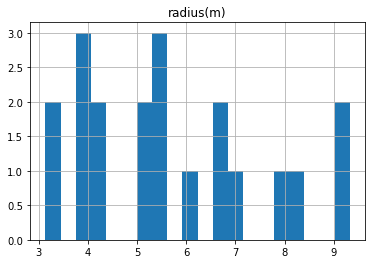

In [156]:
d={
    'radius(m)': np.random.uniform(low=3, high=10, size=(20,))
}
volumes = pd.DataFrame(d)
print(volumes)
volumes.hist(bins=20)

In [160]:
volumes['sphere_vol (m^3)'] = 4/3 * np.pi * volumes['radius(m)']**3
volumes[volumes['sphere_vol (m^3)']> 3000]

,radius(m),sphere_vol (m^3)
7,9.189848,3250.974621
9,9.325441,3397.009192


In [161]:
filename = 'data/volumes.csv'
volumes.to_csv(filename, index=False)

In [164]:
vol = pd.read_csv(filename)
vol.round(decimals=5).equals(volumes.round(decimals=5))

True